In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import oauth2 as oa
import operator
import json

In [5]:
with open('twitter_config.json') as f:
    tokens = json.loads(f.read())

consumer = oa.Consumer(key=tokens['CONSUMER_KEY'],secret=tokens['CONSUMER_SECRET'])
token = oa.Token(key=tokens['ACCESS_TOKEN'],secret=tokens['ACCESS_SECRET'])

client = oa.Client(consumer,token)

## Twitter's REST APIs

Twitter has a rich set of API calls (full list is listed at https://dev.twitter.com/rest/public). Today we'll be using these:

* [GET friends/list](https://dev.twitter.com/rest/reference/get/friends/list) - who is user X is following?
* [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) - who follows user X?

## GET followers/list: let's find out who follows you!
You'll see from the [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) documentation that the URL to get the list of followers is:

    https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]

Which returns:

1) A response body

* JSON representing the data we requested

2) A response header

* There's a lot of stuff here, but one param to note are the **HTTP Response Codes**, which will tell you if the request was successful. Or if not, why. The ones you should note are:

* **200 - STATUS_OKAY** - <font color="#009900">Success :) </font> . This is what you want.

* **429 - RATE_LIMIT_EXCEEDED.** <font color="#990000">Uh-oh, slow it down :/</font>. Twitter limits how frequently you can make requests, and you've exceeded it.
* **401 - UNAUTHORIZED_USER**. Twitter isn't accepting your Consumer/Access tokens. Verify tokens were pasted correctly, or try generating new tokens.
 

Now that we know what to expect, let's try it!

In [9]:
FOLLOWERS_URL = "https://api.twitter.com/1.1/followers/list.json?"
screen_name = 'ImRo45'
url = FOLLOWERS_URL+'?screen_name='+screen_name
header,response = client.request(url,method='GET')

In [10]:
print("Status : ",header['status'])

Status :  200


In [25]:
print(response[:200])

b'{"users":[{"id":3107048520,"id_str":"3107048520","name":"stiffy_prince","screen_name":"nalinikanta00","location":"","description":"","url":null,"entities":{"description":{"urls":[]}},"protected":false'


# Working with Twitter Retweets Data

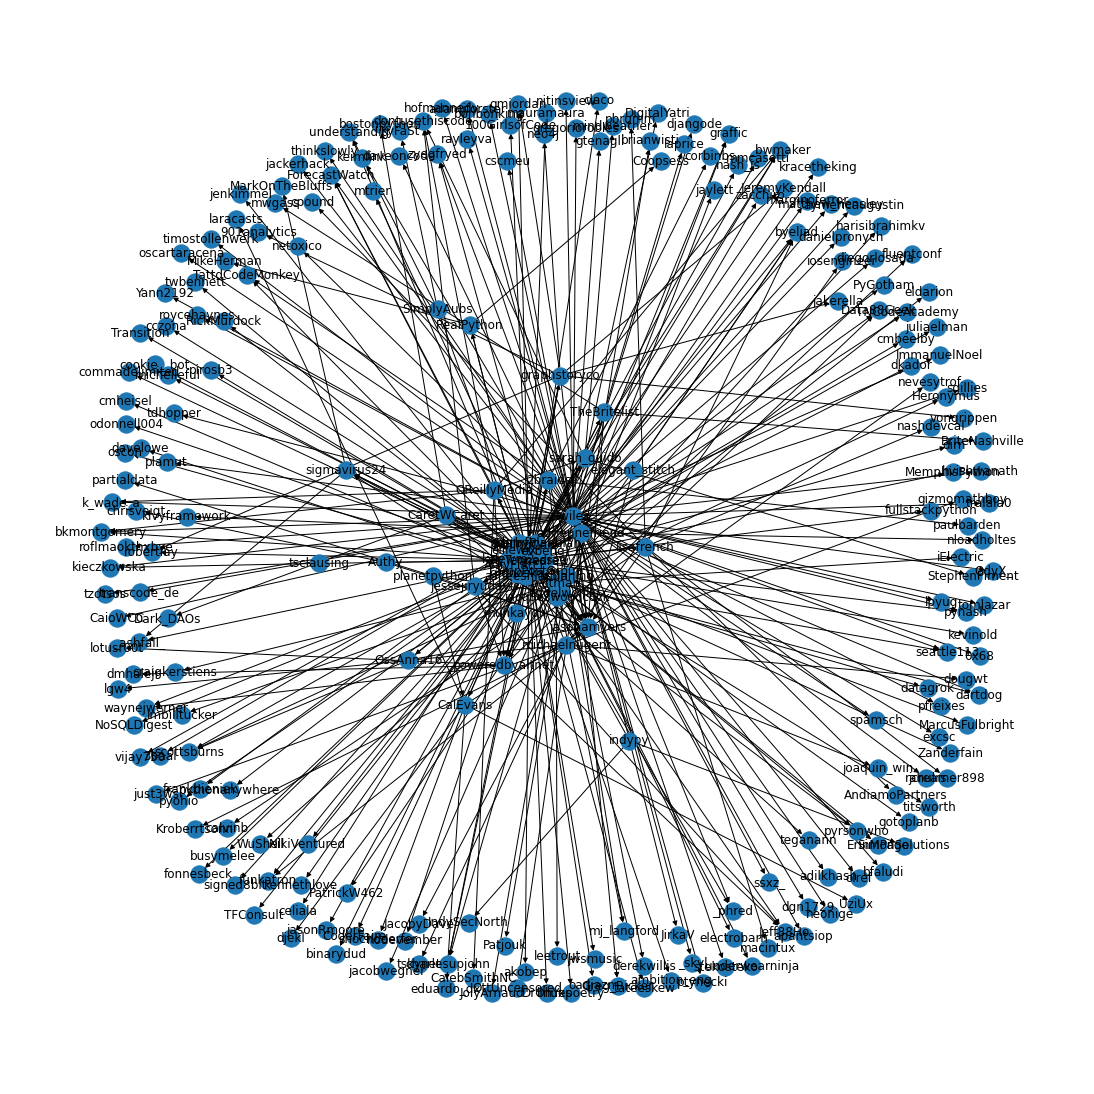

In [29]:
G = nx.read_edgelist('retweets.txt',create_using=nx.DiGraph())
plt.figure(figsize=(15,15))
nx.draw(G,with_labels=True)

In [44]:
LAYOUTS = {
    'circular' : nx.circular_layout,
    'fruchterman_reingold' : nx.fruchterman_reingold_layout,
    'random' : nx.random_layout,
    'shell' : nx.shell_layout,
    'spectral' : nx.spectral_layout,
    'spring' : nx.spring_layout 
}

In [54]:
def save_layout(G,layout_name):
    elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']>1.5]
    esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']<=1.5]
    nlarge = [n for n in G.nodes() if n in ['PyTennessee']]
    pos = LAYOUTS[layout_name](G)
    
    #Nodes
    nx.draw_networkx_nodes(G,pos=pos,nodelist=nlarge,node_size=1)
    
    #Edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.5,edge_color='#cccccc')
    
    #LabelsM
    labels = {}
    labels['PyTennessee'] = 'PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    
    plt.axis('off')
    plt.title(layout_name+" Layout",color='white')
    plt.figure(figsize=(20,10))
    plt.savefig("Layouts/"+layout_name+'.png',dpi=500)

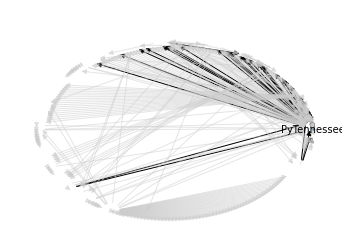

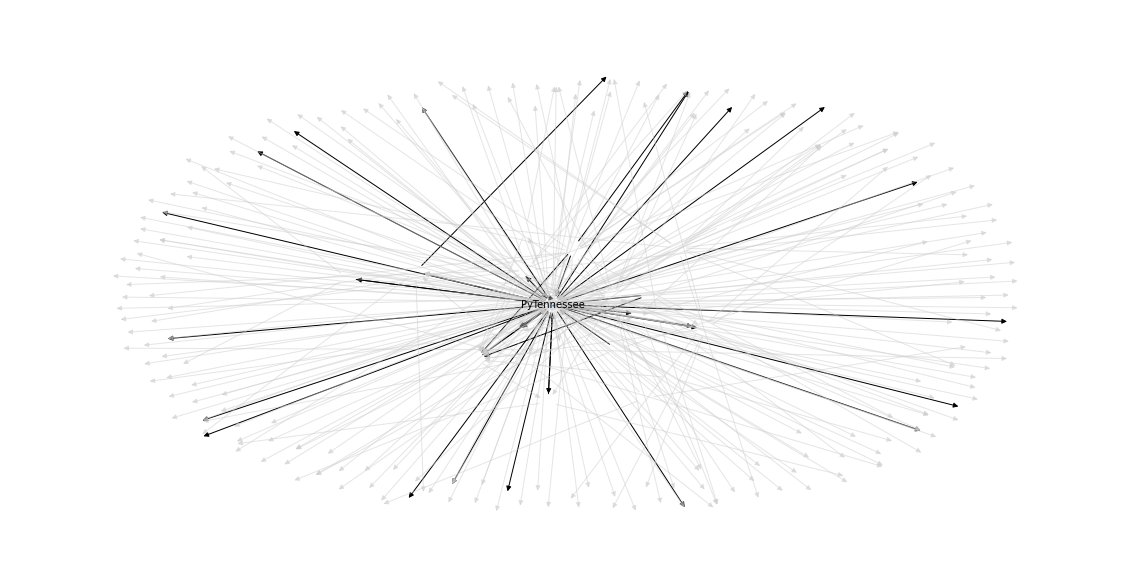

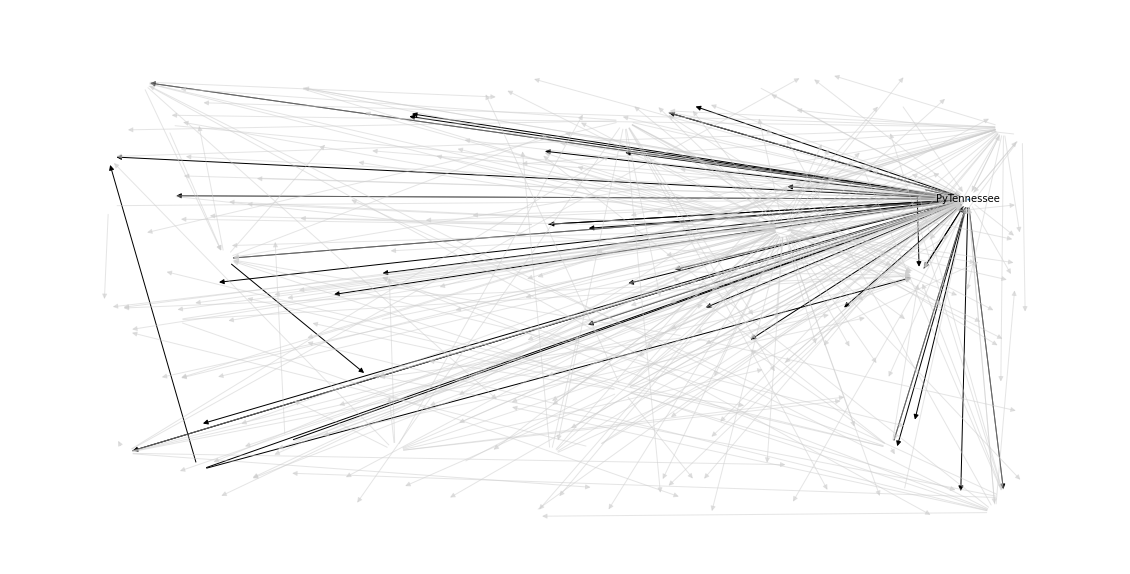

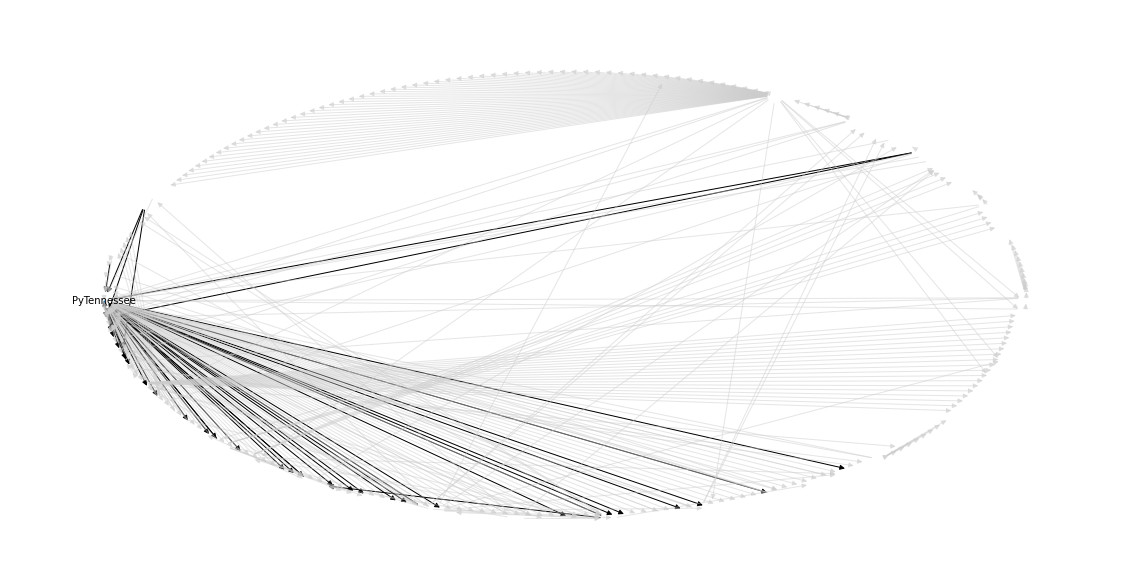

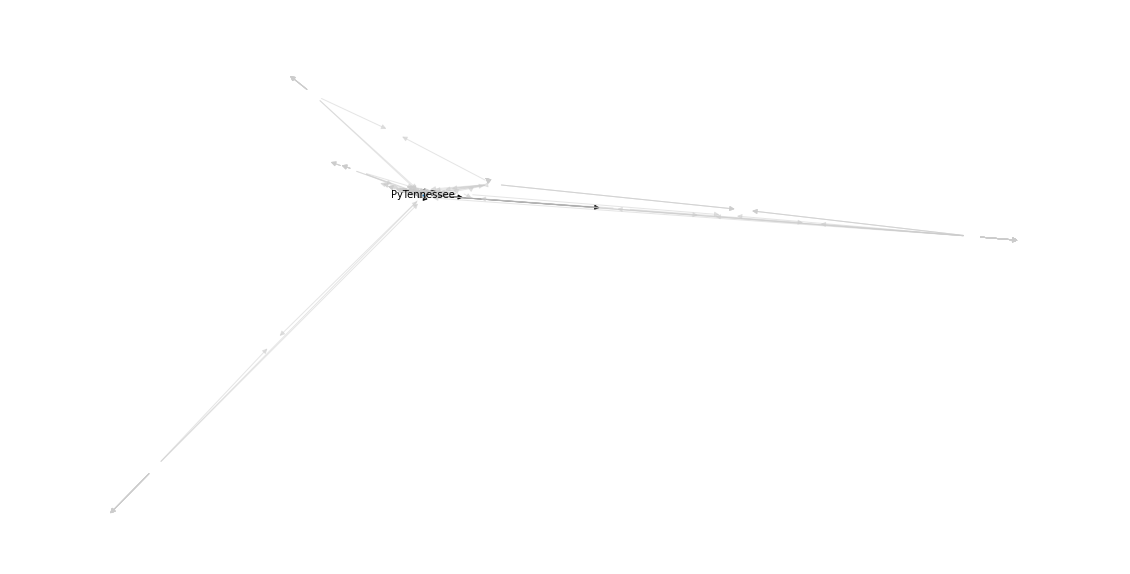

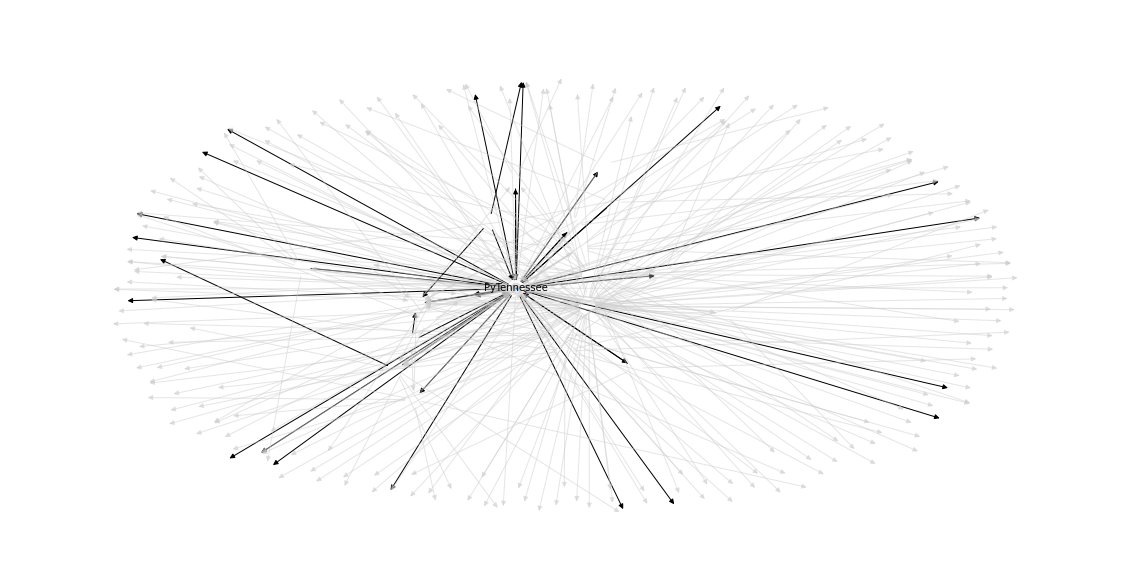

<Figure size 1440x720 with 0 Axes>

In [55]:
for key,value in LAYOUTS.items():
    save_layout(G,key)

# Making Networks witn Twitter Data

In [57]:
file = open('list.PyTennessee.json')

pairs = []
data = json.load(file)

for item in data['users']:
    pairs.append(('PyTennessee',str(item['screen_name'])))

In [59]:
pairs[:10]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember')]

In [61]:
def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))

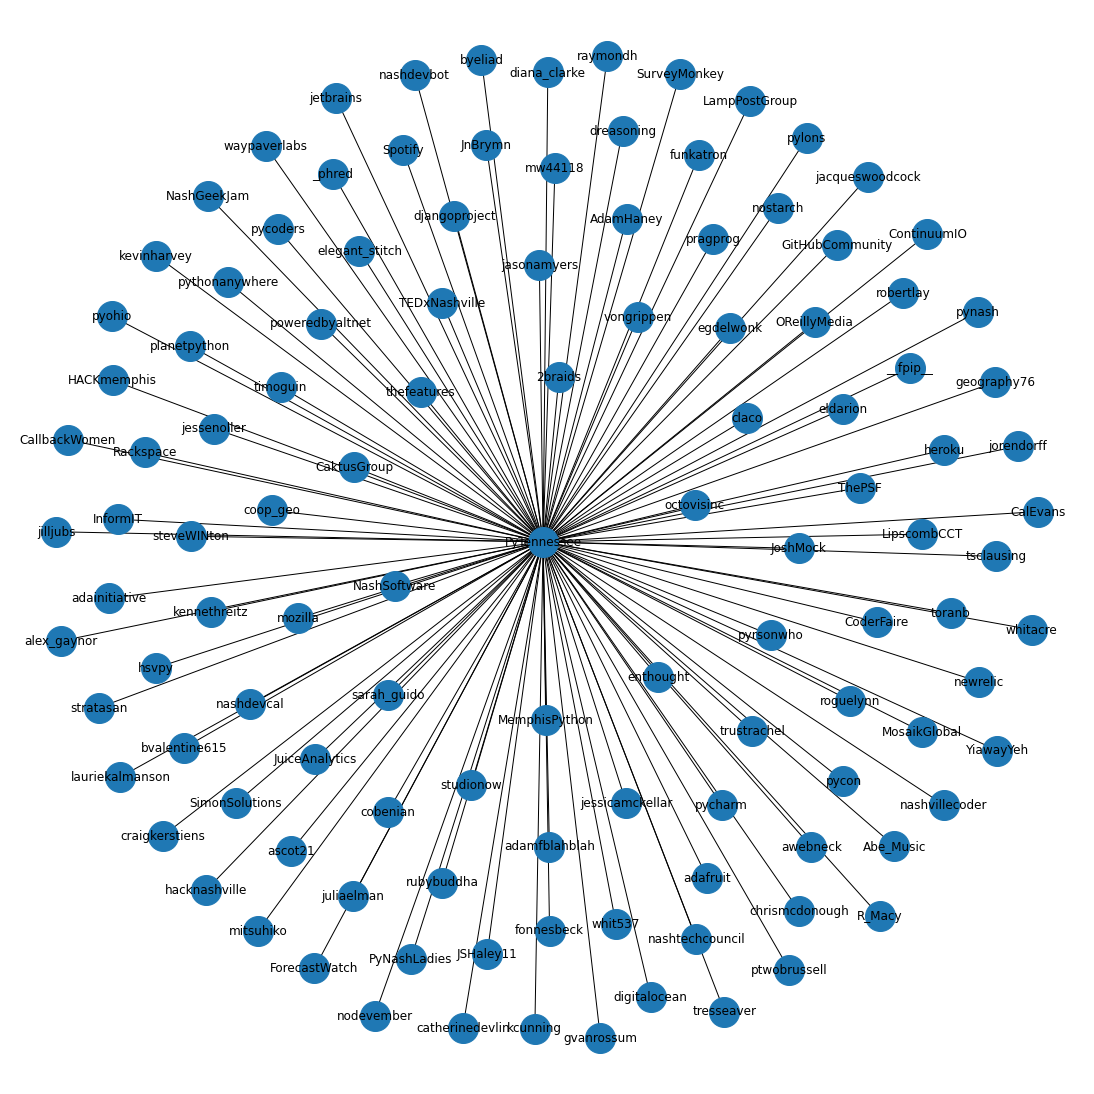

In [65]:
G = nx.Graph()
G.add_edges_from(pairs)

plt.figure(figsize=(15,15))
nx.draw(G,with_labels=True,node_size=900)

In [67]:
#centrality : which nodes have the highest /lowest degree centrality

degree_cent = nx.degree_centrality(G)
degree_sorted = centrality_sort(degree_cent)
print('<-------------------------------------Degree Centrality------------------------------------->')
print('Highest Degree : ',degree_sorted[-5:])
print('\n')
print('Lowest Degree : ',degree_sorted[:5])

<------------------------Degree Centrality------------------------------------->
Highest Degree :  [('byeliad', 0.008620689655172414), ('egdelwonk', 0.008620689655172414), ('R_Macy', 0.008620689655172414), ('jasonamyers', 0.008620689655172414), ('PyTennessee', 1.0)]


Lowest Degree :  [('LampPostGroup', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('nashdevcal', 0.008620689655172414), ('hsvpy', 0.008620689655172414), ('bvalentine615', 0.008620689655172414)]


In [68]:
#betweenness centrality : which nodes have the highest /lowest betweenness centrality

between_cent = nx.betweenness_centrality(G)
between_sorted = centrality_sort(between_cent)

print('<-------------------------------------Betweeness Centrality------------------------------------->')
print('Highest Degree: ',between_sorted[-5:])
print('\n')
print('Lowest degree:',between_sorted[:5])

<-------------------------------------Betweeness Centrality------------------------------------->
Highest Degree:  [('byeliad', 0.0), ('egdelwonk', 0.0), ('R_Macy', 0.0), ('jasonamyers', 0.0), ('PyTennessee', 0.9999999999999999)]


Lowest degree: [('LampPostGroup', 0.0), ('octovisinc', 0.0), ('nashdevcal', 0.0), ('hsvpy', 0.0), ('bvalentine615', 0.0)]


In [70]:
#closenness centrality : which nodes have the highest and lowest closeness centrality

closeness_cent = nx.closeness_centrality(G)
closeness_sorted = centrality_sort(closeness_cent)

print('-------------------------------------Closenness Centrality-------------------------------------')
print('Highest degree:',closeness_sorted[-5:])
print('\n')
print('Lowest degree:',closeness_sorted[:5])

-------------------------------------Closenness Centrality-------------------------------------
Highest degree: [('byeliad', 0.5021645021645021), ('egdelwonk', 0.5021645021645021), ('R_Macy', 0.5021645021645021), ('jasonamyers', 0.5021645021645021), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.5021645021645021), ('octovisinc', 0.5021645021645021), ('nashdevcal', 0.5021645021645021), ('hsvpy', 0.5021645021645021), ('bvalentine615', 0.5021645021645021)]


In [71]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

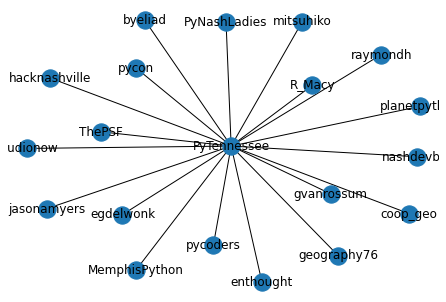

In [72]:
sub = G.subgraph(highest_degree)
nx.draw(sub,with_labels=True)

In [75]:
lowest_degree = [node[0] for node in degree_sorted[:20]]

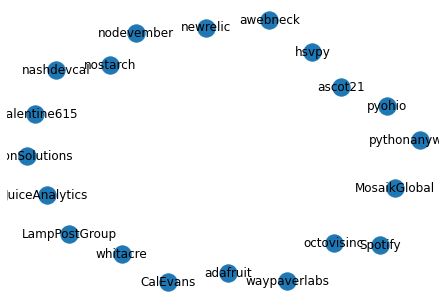

In [76]:
sub = G.subgraph(lowest_degree)
nx.draw(sub,with_labels=True)